In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, cross_val_score


df = pd.read_csv('rentprediction_dataset_v5.csv')

y = df['rent']
X = df.drop(columns={'rent'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(1, 101, 5),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
}

rfr = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,   # Use all available cores
    scoring='neg_mean_squared_error'  # Optimize for MSE
)

# Fit the model
random_search.fit(X, y)

# Retrieve the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model using cross-validation
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [ ]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Optionally, print the best model
print("Best Model:", best_model)

Best Hyperparameters: {'n_estimators': 700, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 81}
Best Model: RandomForestRegressor(max_depth=81, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=700, random_state=42)
Selected Features R-squared value: -1.0950798471999472
Selected Features Mean Squared Error: 3222865.1846061316
Selected Features Mean Squared Error: 1795.2340194543249


In [136]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

df = pd.read_csv('rentprediction_dataset_v5.csv')

y = df['rent']
X = df.drop(columns={'rent'})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfr = RandomForestRegressor(max_depth=81, min_samples_leaf=3, min_samples_split=4, n_estimators=700, random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Selected Features R-squared value: {r2}')
print(f'Selected Features Mean Squared Error: {mse}')
print(f'Selected Features Root Mean Squared Error: {rmse}')
print(f'Selected Features Mean Absolute Error: {mae}')
print(f'Selected Features Mean Absolute Percentage Error: {mape}')

Selected Features R-squared value: 0.8357804796050621
Selected Features Mean Squared Error: 424265.731173119
Selected Features Root Mean Squared Error: 651.3568385862844
Selected Features Mean Absolute Error: 339.584054203391
Selected Features Mean Absolute Percentage Error: 0.1079366799352009


In [138]:
feature_importancess = rfr.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importancess
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_20_features = importance_df.head(20)['Feature']
X_20_features = X[top_20_features]

X_20_features.columns

Index(['sqmtr', 'eucl_dist_to_Roelof Hartplein',
       'eucl_dist_to_Station RAI Amsterdam', 'bathrooms',
       'eucl_dist_to_Elandsgracht', 'eucl_dist_to_Drenthepark',
       'eucl_dist_to_Leidseplein', 'age', 'eucl_dist_to_Rijksmuseum', 'elabel',
       'floor', 'eucl_dist_to_Cornelis Schuytstraat', 'eucl_dist_to_De Pijp',
       'eucl_dist_to_nearest_park', 'eucl_dist_to_Maasstraat',
       'eucl_dist_to_nearest_train_station',
       'eucl_dist_to_Cornelis Troostplein / Van Hillegaertstraat', 'rooms',
       'eucl_dist_to_Europaplein', 'eucl_dist_to_nearest_tramsubway'],
      dtype='object')

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_20_features, y, test_size=0.2, random_state=42)

param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_depth': np.arange(1, 101, 5),
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
}

rfr = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,        # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,   # Use all available cores
    scoring='neg_mean_absolute_error'  # Optimize for MSE
)

random_search.fit(X, y)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

df = pd.read_csv('rentprediction_dataset_v5.csv')

y1 = df['rent']
X_20_features1 = df[['sqmtr', 'eucl_dist_to_Roelof Hartplein','eucl_dist_to_Station RAI Amsterdam', 'bathrooms','eucl_dist_to_Elandsgracht', 'age', 'elabel','floor', 'eucl_dist_to_Cornelis Schuytstraat', 'eucl_dist_to_Cornelis Troostplein / Van Hillegaertstraat', 'rooms']]

In [118]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_20_features1, y1, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(random_state=42, n_estimators= 100, min_samples_split= 4, min_samples_leaf= 3, max_depth= 10)

rfr.fit(X_train1, y_train1)

y_pred_train1 = rfr.predict(X_train1)

r2 = r2_score(y_train1, y_pred_train1)
mse = mean_squared_error(y_train1, y_pred_train1)
rmse = root_mean_squared_error(y_train1, y_pred_train1)
mae = mean_absolute_error(y_train1, y_pred_train1)
mape = mean_absolute_percentage_error(y_train1, y_pred_train1)

print(f'Selected Features Train R-squared value: {r2}')
print(f'Selected Features Train Mean Squared Error: {mse}')
print(f'Selected Features Train Root Mean Squared Error: {rmse}')
print(f'Selected Features Train Mean Absolute Error: {mae}')
print(f'Selected Features Train Mean Absolute Percentage Error: {mape}')

y_pred1 = rfr.predict(X_test1)

r2 = r2_score(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
rmse = root_mean_squared_error(y_test1, y_pred1)
mae = mean_absolute_error(y_test1, y_pred1)
mape = mean_absolute_percentage_error(y_test1, y_pred1)

print(f'Selected Features Test R-squared value: {r2}')
print(f'Selected Features Test Mean Squared Error: {mse}')
print(f'Selected Features Test Root Mean Squared Error: {rmse}')
print(f'Selected Features Test Mean Absolute Error: {mae}')
print(f'Selected Features Test Mean Absolute Percentage Error: {mape}')

Selected Features Train R-squared value: 0.9102346115355672
Selected Features Train Mean Squared Error: 170463.85517808428
Selected Features Train Root Mean Squared Error: 412.8726864035502
Selected Features Train Mean Absolute Error: 208.81435432934248
Selected Features Train Mean Absolute Percentage Error: 0.0691710268627238
Selected Features Test R-squared value: 0.8532044992860871
Selected Features Test Mean Squared Error: 379250.2882332871
Selected Features Test Root Mean Squared Error: 615.8330035271633
Selected Features Test Mean Absolute Error: 316.35730600055734
Selected Features Test Mean Absolute Percentage Error: 0.10034826647417545


In [107]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_error, make_scorer
import pandas as pd

# Define a scorer for MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Apply RFECV
rfecv = RFECV(estimator=model, step=1, cv=5, scoring=mae_scorer)
rfecv.fit(X_train1, y_train1)

# Get the optimal number of features
optimal_num_features = rfecv.n_features_
print("Optimal number of features:", optimal_num_features)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected features:", selected_features)

KeyboardInterrupt: 

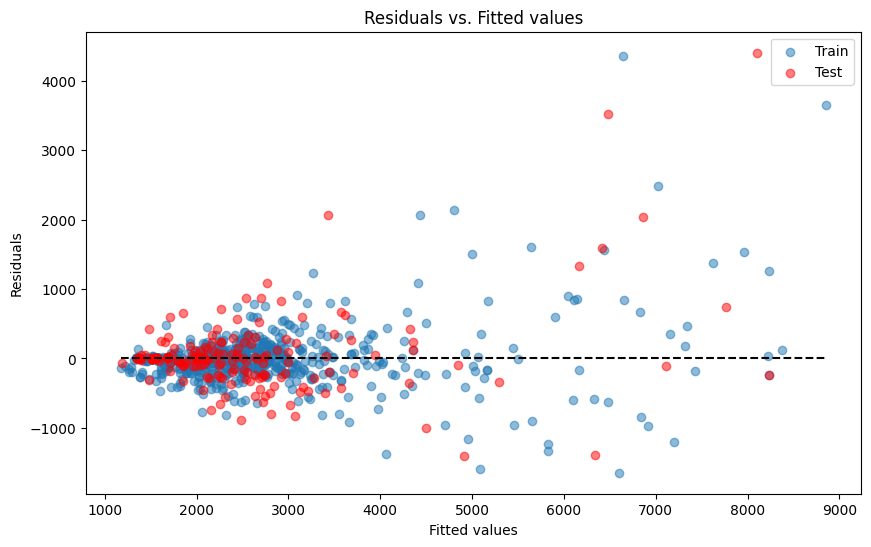

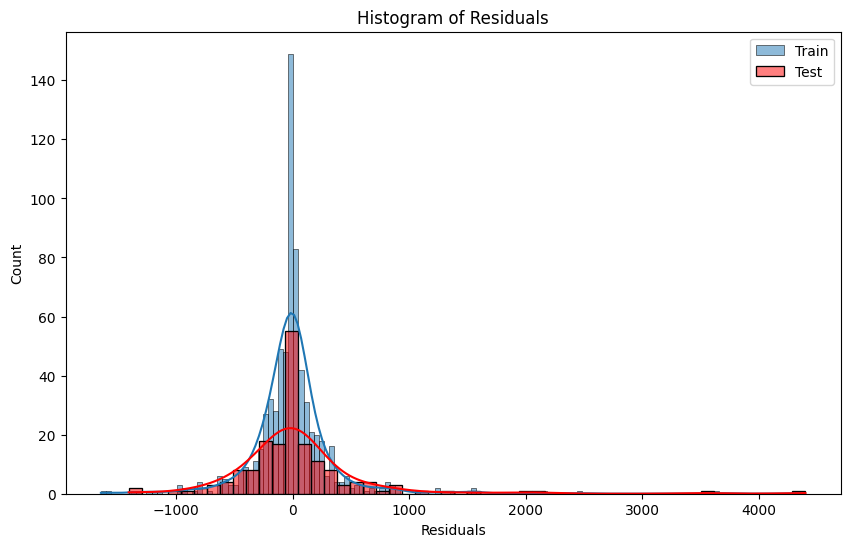

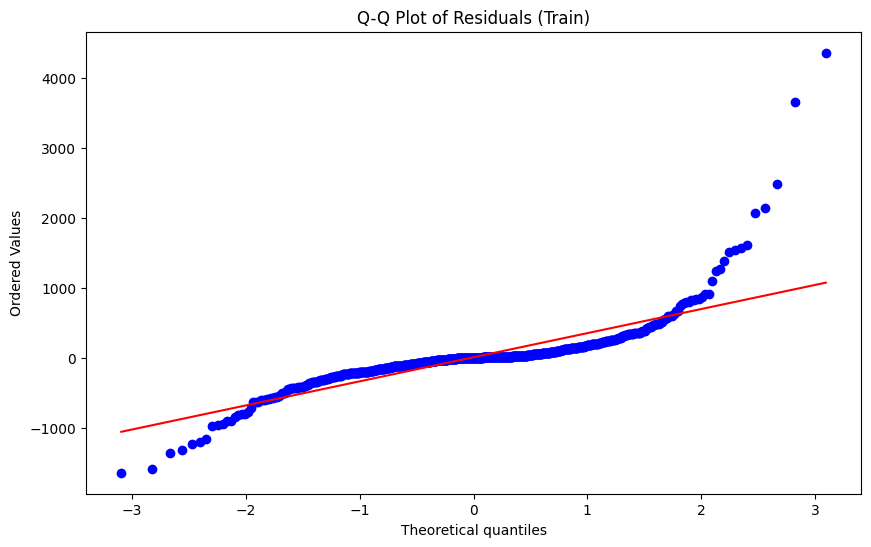

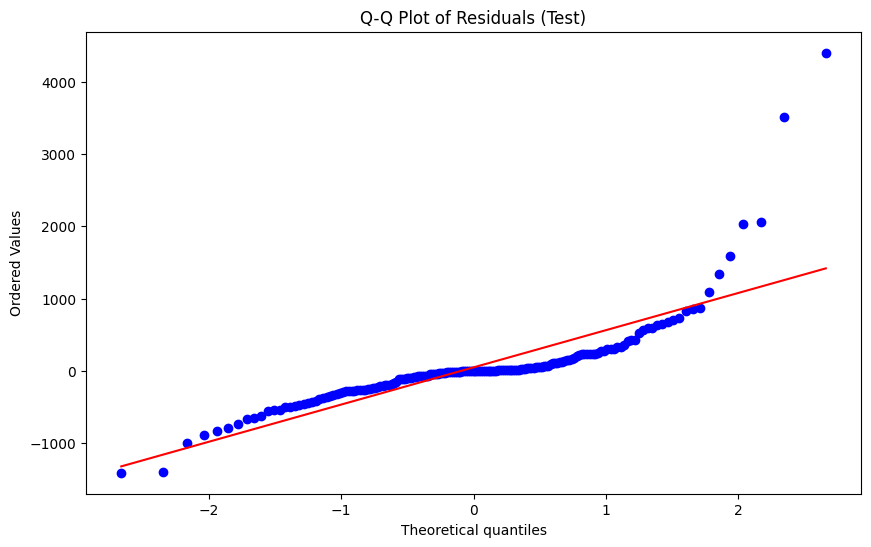

In [119]:
# Calculate residuals
residuals_train = y_train1 - y_pred_train1
residuals_test = y_test1 - y_pred1

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Residuals vs. Fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train1, residuals_train, alpha=0.5, label='Train')
plt.scatter(y_pred1, residuals_test, alpha=0.5, label='Test', color='red')
plt.hlines(0, min(y_pred_train1), max(y_pred_train1), colors='black', linestyles='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.legend()
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_train, kde=True, label='Train')
sns.histplot(residuals_test, kde=True, label='Test', color='red')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.legend()
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Train)')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Test)')
plt.show()


In [6]:
df[['rent', 'sqmtr', 'bathrooms',  'rooms', 'age', 'elabel','floor', 'eucl_dist_to_Cornelis Schuytstraat', 'eucl_dist_to_Cornelis Troostplein / Van Hillegaertstraat','eucl_dist_to_Station RAI Amsterdam',  'eucl_dist_to_Roelof Hartplein', 'eucl_dist_to_Elandsgracht']].describe()

,rent,sqmtr,bathrooms,rooms,age,elabel,floor,eucl_dist_to_Cornelis Schuytstraat,eucl_dist_to_Cornelis Troostplein / Van Hillegaertstraat,eucl_dist_to_Station RAI Amsterdam,eucl_dist_to_Roelof Hartplein,eucl_dist_to_Elandsgracht
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,2657.670442,91.778445,2.069749,3.156921,64.379388,3.786363,4.539108,0.044529,0.046445,0.052611,0.044443,0.041958
std,1427.778034,41.610723,0.607530,1.167141,91.522979,1.367359,4.697127,0.036227,0.034766,0.033891,0.035232,0.035766
min,1045.000000,24.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.001961,0.002505,0.003135,0.001212,0.001348
25%,1790.500000,65.000000,1.903630,2.000000,0.000000,3.000000,2.000000,0.023299,0.022919,0.030904,0.021336,0.020658
50%,2300.000000,77.859320,2.000000,3.000000,26.000000,4.000000,3.000000,0.039457,0.039492,0.050054,0.039668,0.037014
75%,2950.000000,107.000000,2.247259,4.000000,118.000000,5.000000,5.000000,0.049826,0.069571,0.075391,0.060917,0.049156
max,12500.000000,350.000000,6.000000,9.000000,1019.000000,8.000000,31.000000,0.718110,0.713223,0.700631,0.715396,0.731142
